In [1]:

# coding: utf-8

import tweepy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.options.display.max_columns = 50
pd.options.display.max_rows= 50
pd.options.display.width= 120

consumer_key ="cf6yoFiRnumb8YCgAc7i2890Z"
consumer_secret = "V4cP4UqqoYjiyxV8gsK9n91Bztg4qCowhFGLcjngTYBX6BfbmO"

auth = tweepy.OAuthHandler(consumer_key=consumer_key, consumer_secret=consumer_secret)


access_token = "3377301250-JkIbLxJp5oYnJHCJ3SVvBaOezBgTNGTSfyFGDiV"
access_token_secret = "TDaatB09DV6RjStolXxMayzAe2o836U280xwyI4Z173yj"
auth.set_access_token(access_token, access_token_secret)

# Creation of the actual interface, using authentication
api = tweepy.API(auth)

#Switching to application authentication
auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)

#Setting up new api wrapper, using authentication only
api = tweepy.API(auth, wait_on_rate_limit=True,wait_on_rate_limit_notify=True)
 
#Error handling
if (not api):
    print ("Problem Connecting to API")
else:
    print "Autenticado"

Autenticado


In [18]:
i= 0
total = 100000
all_tweets = []
for tweet in tweepy.Cursor(api.search,q='*',count=100,lang="es").items():
    i +=1
    if i % 1000 == 0:
        print i
    all_tweets.append(tweet)
    if i >= total:
        break
        

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
Rate limit reached. Sleeping for: 185
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
Rate limit reached. Sleeping for: 249
90000
91000
92000
93000


TweepError: Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=60)

In [ ]:
places_dict = {}
loc = {}
geos = 0
nl = 0
for tweet in all_tweets:
    if tweet.user.location != None:
        location = tweet.user.location
        loc[location] = 1 if not loc.has_key(location) else loc[location] +1
    else:
        nl += 1
    if tweet.place != None:
        plc = tweet.place.name
        places_dict[plc] = 1 if not places_dict.has_key(plc) else places_dict[plc] + 1
    if tweet.user.geo_enabled:
        geos +=1


print "La cantidad de location == '' : " + str(loc['']) + ", el %" + str(100.0*(loc[''])/(len(all_tweets)))
print "La cantidad total de tweets: "  + str(len(all_tweets))
print "La cantidad de usarios con geolocalizacion " + str(geos) + ", el %" + str(100.0*(geos)/(len(all_tweets)))


canti = 20
for w in sorted(loc, key=loc.get, reverse=True)[:canti]:
    print w, loc[w]


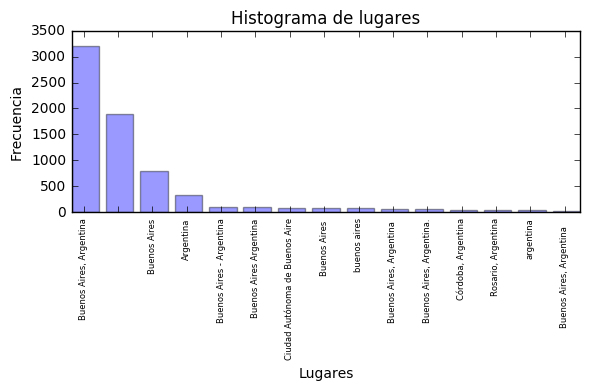

In [5]:
plt.title("Histograma de lugares")
plt.xlabel("Lugares")
plt.ylabel("Frecuencia")

index = np.arange(len(loc.keys()))
bar_width = 0.35


cant = 15
valores = sorted(loc.values(),reverse=True)
claves = sorted(loc, key=loc.get,reverse=True)

opacity = 0.4
plt.xticks(index + bar_width, claves[:cant], size=6, rotation="vertical")
plt.bar(range(cant),valores[:cant],alpha=opacity,color='b',)
plt.tight_layout()
plt.show()

In [14]:
import json
cor = []
for tweet in all_tweets:
    if tweet.user.location == u'': 
        cor.append(tweet)


for c in cor:
    if hasattr(c,'retweeted_status'): # o tiene geolocalizacion
        print 'RETWEET ' + c.retweeted_status.user.location
    else:# o la persona de la que retwitteo tiene esa locacion
        print 'NOOOOOOOOOOOOOOOOOOOOOOOOOOOOO GEO ' + (c.place.name) 


RETWEET Buenos Aires, Argentina
RETWEET Argentina - Buenos Aires
RETWEET Argentina - Buenos Aires
RETWEET Argentina - Buenos Aires
RETWEET Buenos Aires
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires - Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Adrogué, Buenos Aires
RETWEET Buenos Aires
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires
RETWEET Argentina - Buenos Aires
RETWEET Buenos Aires, Argentina
RETWEET Buenos aires
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
NOOOOOOOOOOOOOOOOOOOOOOOOOOOOO GEO Ciudad Autónoma de Buenos Aires
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Arg

In [8]:
import json
cor = []
for tweet in all_tweets:
    if tweet.user.location == u'Córdoba, Argentina': 
        cor.append(tweet)


for c in cor:
    if c.place != None: # o tiene geolocalizacion
        print 'GEO ' + (c._json['place']['name'])
    else:# o la persona de la que retwitteo tiene esa locacion
         print 'RETWEET ' + c.retweeted_status.user.location



RETWEET Buenos Aires - Argentina
RETWEET Buenos Aires
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires.
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires.
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires
RETWEET Buenos Ai

In [11]:
user = api.get_user(screen_name = 'damianealeman')
print user.location
print user


User(follow_request_sent=None, has_extended_profile=True, profile_use_background_image=True, _json={u'follow_request_sent': None, u'has_extended_profile': True, u'profile_use_background_image': True, u'profile_text_color': u'333333', u'default_profile_image': False, u'id': 3377301250, u'profile_background_image_url_https': u'https://abs.twimg.com/images/themes/theme1/bg.png', u'verified': False, u'translator_type': u'none', u'profile_location': None, u'profile_image_url_https': u'https://pbs.twimg.com/profile_images/621296170053332992/7RyoklBR_normal.jpg', u'profile_sidebar_fill_color': u'DDEEF6', u'entities': {u'description': {u'urls': []}}, u'followers_count': 8, u'profile_sidebar_border_color': u'C0DEED', u'id_str': u'3377301250', u'profile_background_color': u'C0DEED', u'listed_count': 0, u'status': {u'contributors': None, u'truncated': False, u'text': u'A ver ahora asdqasdqasdq', u'is_quote_status': False, u'in_reply_to_status_id': None, u'id': 799030529752526848, u'favorite_coun